# $\tau_\mathrm{cross}$ en fonction des paramètres du problème.

### Systèmes : 1 particule confiné entre deux murs rigides.

Code origine : 

Théorie = $\mathrm{\color{red}{Cumulant4\_fonction.py}}$.

Simulations = $\mathrm{\color{red}{DoubleRigidWallOverBrow\_TheoVerification\_Cython.pyx}}$.

Auteur : $\mathrm{\color{purple}{Élodie ~MILLAN}}$

Date : 01/02/2022

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from Cumulant4_fonction import C4_long, C4_court, Cross_time
from DoubleRigidWallOverBrow_TheoVerification_Cython import RigidWallOverdampedLangevin3D
from scipy.integrate import quad
from scipy.io import loadmat
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from numpy import trapz
from scipy import interpolate


def cm2inch(value):
    return value / 2.54

from tqdm import tqdm


mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 1
mpl.rcParams["figure.dpi"] = 200
from matplotlib import rc

rc("font", family="serif")
rc("text", usetex=True)
rc("xtick", labelsize="medium")
rc("ytick", labelsize="medium")
rc("axes", labelsize="large")

In [3]:
# Gamma(z) para et perpendiculaire du pb.
def gamma_z_eff(zi_1, a, eta, H):
    """
    Formule de Padé
    """
    # Mur Top
    gam_z = (
        6
        * np.pi
        * a
        * eta
        * (
            (
                (6 * (H-zi_1)**2 + 9*a*(H-zi_1) + 2*a**2)
                / (6 * (H-zi_1)**2 + 2*a*(H-zi_1))
            )
        )
    )
    # Mur Bottom
    gam_z_2 = (
        6
        * np.pi
        * a
        * eta
        * (
            (
                (6 * (H+zi_1)**2 + 9*a*(H+zi_1) + 2*a**2)
                / (6 * (H+zi_1)**2 + 2*a*(H+zi_1))
            )
        )
    )

    gam_z_0 = 6 * np.pi * a * eta

    return (gam_z + gam_z_2 - gam_z_0)

def gamma_xy_eff(zi_1, a, eta, H):
    """
    Formule de Libshaber
    """
    # Mur Top
    gam_xy_T = (
        6
        * np.pi
        * a
        * eta
        * (
            1
            - ((9 * a) / (16 * ((H-zi_1) + a)))
            + (a / (8 * ((H-zi_1) + a))) ** 3
            - (45 * a / (256 * ((H-zi_1) + a))) ** 4
            - (a / (16 * ((H-zi_1) + a))) ** 5
        )
        ** (-1)
    )

    gam_xy_B = (
        6
        * np.pi
        * a
        * eta
        * (
            1
            - ((9 * a) / (16 * ((H+zi_1) + a)))
            + (a / (8 * ((H+zi_1) + a))) ** 3
            - (45 * a / (256 * ((H+zi_1) + a))) ** 4
            - (a / (16 * ((H+zi_1) + a))) ** 5
        )
        ** (-1)
    )

    gam_xy_0 = 6 * np.pi * a * eta

    return (gam_xy_T + gam_xy_B - gam_xy_0)



In [15]:
eta=0.001
kBT=1.38e-23*300
a = 1.5e-6


lB = np.linspace(50e-9, 150e-9, 10)
hh = np.linspace(0.1e-6, 0.8e-6, 10)

Tau_cross_h = np.zeros((len(hh), len(lB)))

for l, h in tqdm(enumerate(hh)):
    for m, b in enumerate(lB):
        V_theo = lambda z: kBT/b*z
        D_perp = lambda z: kBT/gamma_z_eff(z, a, eta, h)
        D_para = lambda z: kBT/gamma_xy_eff(z, a, eta, h)
    
        Tau_cross_h[l, m] = Cross_time(Dpara=D_para, Dperp=D_perp, V=V_theo, kBT=kBT, a=-(h-h*1e-3), b=+(h-h*1e-3))

10it [00:26,  2.66s/it]


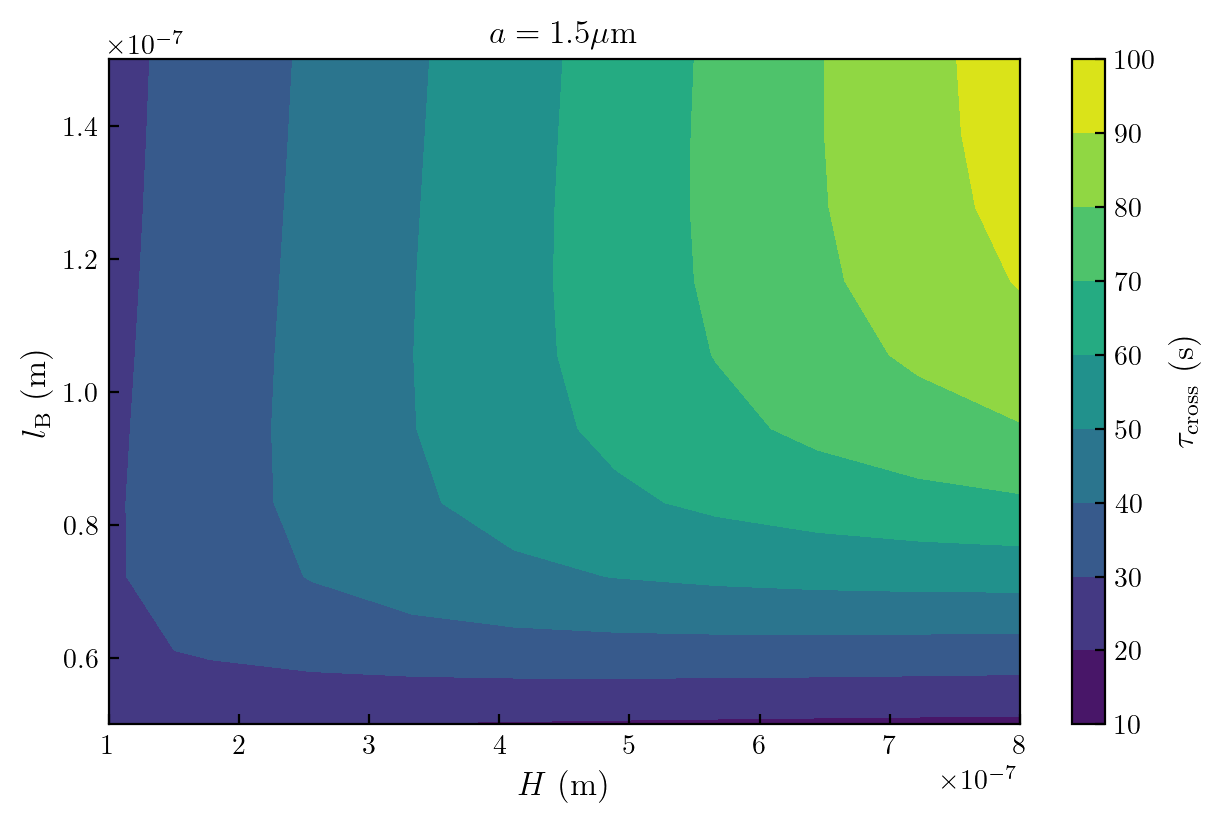

In [16]:
H, l_D = np.meshgrid(hh, lB, sparse=True)
fig1, ax2 = plt.subplots(constrained_layout=True)
CS = ax2.contourf(hh, lB, Tau_cross_h)#, levels,cmap="plasma",)
cbar = fig1.colorbar(CS)
# h = plt.contourf
plt.xlabel(r"$H~(\mathrm{m})$")
plt.ylabel(r"$l_\mathrm{B}~(\mathrm{m})$")
cbar.ax.set_ylabel(r"$\tau_\mathrm{cross}~(\mathrm{s})$")
plt.title(r"$a = 1.5 \mu \mathrm{m}$")
plt.show()